<a href="https://colab.research.google.com/github/pascualcam/aiml_code/blob/main/ch6/ch6_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import numpy as np
import pandas as pd
import json

In [121]:
from bs4 import BeautifulSoup
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [122]:
from bs4 import BeautifulSoup
import string

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

In [123]:
data = [json.loads(line)
        for line in open("/content/drive/MyDrive/Colab Notebooks/data/sarcasm2.json", 'r', encoding='utf-8')]

# with open("/content/drive/MyDrive/Colab Notebooks/data/sarcasm2.json", 'r') as f:÷
#   datastore = json.load(f)

In [124]:
sentences = []
labels = []
urls = []
for item in data:
  sentence = item['headline'].lower()
  sentence = sentence.replace(",", " , ")
  sentence = sentence.replace(".", " , ")
  sentence = sentence.replace("-", " - ")
  sentence = sentence.replace("/", " / ")
  soup = BeautifulSoup(sentence)
  sentence = soup.get_text()
  words = sentence.split()
  filtered_sentence = ""

  for word in words:
    word = word.translate(table)
    if word not in stopwords:
      filtered_sentence = filtered_sentence + word + " "
  sentences.append(filtered_sentence)
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

<ipython-input-124-86c91bada00f>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence)


In [125]:
training_size = 2300
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = sentences[training_size:]

In [126]:
vocab_size = 2000
max_length = 10
trunc_type = 'post'
padding_type = 'post'
oov_tok = "OOV"

In [127]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [128]:
word_index = tokenizer.word_index

In [129]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, padding='post')

print(word_index)

{'OOV': 1, 'new': 2, 'man': 3, 'trump': 4, 'not': 5, 'just': 6, 'report': 7, 'first': 8, 'can': 9, 'like': 10, 'one': 11, 'life': 12, 'house': 13, 'area': 14, 'year': 15, 'will': 16, 's': 17, 'says': 18, 'no': 19, 'day': 20, 'old': 21, 'get': 22, 'donald': 23, 'u': 24, 'woman': 25, 'time': 26, 'white': 27, 'now': 28, 'clinton': 29, 'obama': 30, 'people': 31, 'americans': 32, 'off': 33, 'study': 34, 'finds': 35, 'still': 36, 'back': 37, 'know': 38, 'say': 39, 'women': 40, 'show': 41, 'work': 42, 'make': 43, 'gop': 44, 'nation': 45, 'love': 46, 'president': 47, 'trumps': 48, 'gets': 49, '5': 50, 'bill': 51, 'years': 52, 'american': 53, '4': 54, 'party': 55, 'last': 56, 'parents': 57, 'video': 58, '10': 59, 'made': 60, 'makes': 61, 'mom': 62, 'watch': 63, 'see': 64, 'game': 65, 'best': 66, 'dead': 67, 'go': 68, 'way': 69, 'family': 70, 'cant': 71, 'big': 72, 'black': 73, 'world': 74, 'getting': 75, 'police': 76, 'child': 77, 'may': 78, 'million': 79, 'right': 80, '1': 81, 'hillary': 82, '

In [130]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [131]:
# tf.keras.layers.Embeddings(vocab_size, embedding_dim)

In [132]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000, 7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [133]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 7)           14000     
                                                                 
 global_average_pooling1d_4  (None, 7)                 0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_8 (Dense)             (None, 8)                 64        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 14073 (54.97 KB)
Trainable params: 14073 (54.97 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [134]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [135]:
wc = tokenizer.word_counts
print(wc)

OrderedDict([('thirtysomething', 1), ('scientists', 12), ('unveil', 3), ('doomsday', 1), ('clock', 1), ('hair', 7), ('loss', 3), ('dem', 1), ('rep', 3), ('totally', 5), ('nails', 5), ('congress', 10), ('falling', 3), ('short', 6), ('gender', 3), ('racial', 3), ('equality', 2), ('eat', 2), ('veggies', 1), ('9', 12), ('deliciously', 1), ('different', 4), ('recipes', 3), ('inclement', 1), ('weather', 2), ('prevents', 1), ('liar', 1), ('getting', 18), ('work', 24), ('mother', 8), ('comes', 6), ('pretty', 10), ('close', 4), ('using', 6), ('word', 8), ('streaming', 1), ('correctly', 1), ('white', 35), ('inheritance', 1), ('5', 21), ('ways', 9), ('file', 1), ('taxes', 2), ('less', 9), ('stress', 3), ('richard', 2), ('bransons', 1), ('global', 6), ('warming', 3), ('donation', 1), ('nearly', 3), ('much', 13), ('cost', 5), ('failed', 4), ('balloon', 1), ('trips', 1), ('shadow', 4), ('government', 7), ('large', 7), ('meet', 5), ('marriott', 1), ('conference', 5), ('room', 8), ('b', 3), ('lots', 2

In [136]:
from collections import OrderedDict
newlist = (OrderedDict(sorted(wc.items(), key=lambda t: t[1], reverse=True)))
print(newlist)

OrderedDict([('new', 138), ('man', 127), ('trump', 122), ('not', 68), ('just', 55), ('report', 54), ('first', 48), ('can', 47), ('like', 45), ('one', 44), ('life', 43), ('house', 42), ('area', 41), ('year', 41), ('will', 41), ('s', 40), ('says', 40), ('no', 39), ('day', 38), ('old', 38), ('get', 38), ('donald', 37), ('u', 37), ('woman', 36), ('time', 36), ('white', 35), ('now', 33), ('clinton', 32), ('obama', 31), ('people', 31), ('americans', 31), ('off', 30), ('study', 29), ('finds', 29), ('still', 28), ('back', 27), ('know', 26), ('say', 26), ('women', 25), ('show', 25), ('work', 24), ('make', 23), ('gop', 23), ('nation', 23), ('love', 22), ('president', 22), ('trumps', 22), ('gets', 22), ('5', 21), ('bill', 21), ('years', 21), ('american', 21), ('4', 21), ('party', 21), ('last', 21), ('parents', 20), ('video', 20), ('10', 20), ('made', 20), ('makes', 20), ('mom', 20), ('watch', 20), ('see', 20), ('game', 19), ('best', 19), ('dead', 19), ('go', 19), ('way', 19), ('family', 19), ('ca

Let's plot the histogram

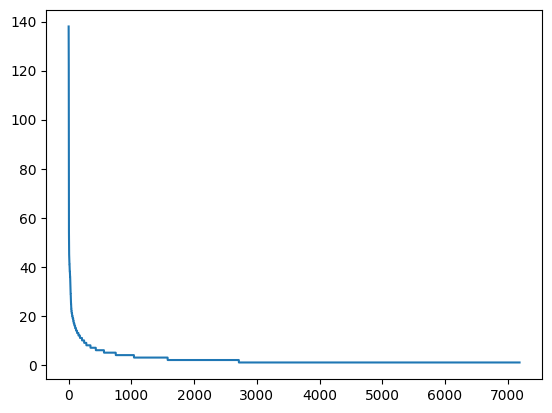

In [137]:
import matplotlib.pyplot as plt

# init
xs = []
ys = []
curr_x = 1

# iterate
for item in newlist:
  xs.append(curr_x)
  curr_x = curr_x + 1
  ys.append(newlist[item])

# plot
plt.plot(xs, ys)
plt.show()

The hockey stick shape suggests that very few words are used many times whereas many words are not used that much.

Let's zoom in;

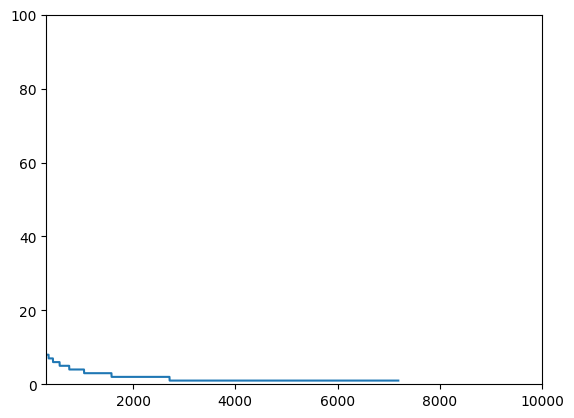

In [138]:
plt.plot(xs, ys)
plt.axis([300, 10000, 0, 100])
plt.show()

Let's change embeddings from 16 to 7, rooughly the fourth root of the vocab size (2000) and add dropout to reduce overfitting.

In [139]:
sentences = [
    "granny starting to fear spiders in the garden might be real",
    "game of thrones season finale showing this sunday night",
    "TensorFlow book will be a best seller"
]

In [140]:
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

[[1, 688, 1, 459, 1, 1, 1, 1, 403, 1, 130], [65, 1, 1030, 122, 1479, 1, 1, 1, 237], [1, 518, 16, 1, 1, 66, 1]]


In [141]:
# let's pad these sequences similarly to the model training shape
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(padded)

[[   1  688    1  459    1    1    1    1  403    1]
 [  65    1 1030  122 1479    1    1    1  237    0]
 [   1  518   16    1    1   66    1    0    0    0]]


In [142]:
print(model.predict(padded))

1/1 [==============================] - 0s 92ms/step
[[0.4922711 ]
 [0.4966352 ]
 [0.49597055]]


Let's visualize embeddings

In [143]:
# http://projector.tensorflow.org/
# before heading to the projector, we need to reverse the word index

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [144]:
# extract weights of vectors in embeddings
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(2000, 7)


In [145]:
print(reverse_word_index[2])
print(weights)

new
[[-0.04900537 -0.01109719 -0.03520646 ... -0.04436622  0.00719076
  -0.02769767]
 [ 0.03389579 -0.02896169  0.00601262 ...  0.02786002 -0.0475635
   0.0372295 ]
 [-0.00733358  0.00539485  0.00525866 ...  0.04029781 -0.00365648
   0.02106318]
 ...
 [ 0.04451625 -0.00675054 -0.01977491 ...  0.00815927 -0.02997637
   0.01215795]
 [ 0.01090151  0.01831971 -0.04713785 ... -0.00886762  0.0012357
   0.00445015]
 [ 0.02430484 -0.02675699  0.03008851 ...  0.00702244 -0.01256739
   0.03792145]]


In [146]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\tv'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [147]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>